In [1]:
import networkx as nx
import scipy.sparse as sp
#Import important library 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('.')


# Internal inmport

from src.models.GraphModelclass import *
from src.models.mGGclass import mGG
from src.models.GGclass import GG

from src.utils.AuxiliaryFunc import *
from src.inference.GraphMCMCclass import * 

from src.sampling.CaronFoxGraph_rnd import CRMtoGraph
from src.sampling.mGG_size_biased_rnd import mGG_size_biased_sampling
from src.sampling.GG_size_biased_rnd import GG_size_biased_sampling

from src.display.plotposteriorpredictivedegreedistrib import plot_posterior_predictive_degree
from src.display.plotdegreedistribut import plot_degree

# Comparative degree distributions

In [2]:
n_rep = 50  # Number of graph repetitions
bins = 16

In [3]:
Tmax = 1
alpha = 1.0
tau = 0.0
beta_true = 1.0
c_true = 1
eta_true = 1000.0

PPP = mGG(alpha=alpha, tau=tau, beta=beta_true, c=c_true, eta=eta_true)

# H= uniforme on [0,Tmax]
N_weight = 10**5 # Number of weights

## CRM
bins=16
FREQ_mGG = np.zeros((n_rep, bins))


for i in tqdm(range(n_rep)):
    # Generate a CRM graph
    w_CRM, missing_mass, S = mGG_size_biased_sampling(alpha, tau, beta_true, c_true, eta_true, N_weight)
    G, wtrue, wtrue_rem, G_multi, ind_w = CRMtoGraph(w_CRM, missing_mass, store=True)
    K = G.shape[0]
    centerbins, freq, deg = plot_degree(G, display=False)
    FREQ_mGG[i, :] = freq
print(K)
quantile_freq_mGG = np.quantile(FREQ_mGG, [0,1], axis=0)


100%|██████████| 50/50 [00:04<00:00, 10.26it/s]

145795


In [4]:
# Parameters
Tmax=1    # H= uniforme on [0,Tmax]
alpha=0.5
beta=1
eta=1000
c=1

PPP=GG(alpha=alpha,beta=beta,eta=eta,c=c)
N_weight = 10**5 # Number of weights


## CRM
bins=16
FREQ_GG = np.zeros((n_rep, bins))


for i in tqdm(range(n_rep)):
    # Generate a CRM graph
    w_CRM, missing_mass = GG_size_biased_sampling(alpha, beta, eta,1, N_weight)
    G, wtrue, wtrue_rem, G_multi, ind_w = CRMtoGraph(w_CRM, missing_mass, store=True)
    K = G.shape[0]
    centerbins, freq, deg = plot_degree(G, display=False)
    FREQ_GG[i, :] = freq

print(K)
quantile_freq_GG = np.quantile(FREQ_GG, [0, 1], axis=0)

100%|██████████| 50/50 [00:20<00:00,  2.48it/s]

93866


In [5]:
FREQ_BA = np.zeros((n_rep, bins))

N_nodes = 10**5  # Number of nodes
m = 1  # Number of edges per new node (adjustable)

for i in tqdm(range(n_rep)):
    # Generate a Barabási–Albert graph
    G = nx.barabasi_albert_graph(N_nodes, m)
    G = nx.to_scipy_sparse_array(G, format='coo')
    # Compute degree distribution
    centerbins, freq, deg = plot_degree(G, bins=bins, display=False)
    FREQ_BA[i, :] = freq

quantile_freq_ba = np.quantile(FREQ_BA, [0, 1], axis=0)

100%|██████████| 50/50 [00:17<00:00,  2.86it/s]


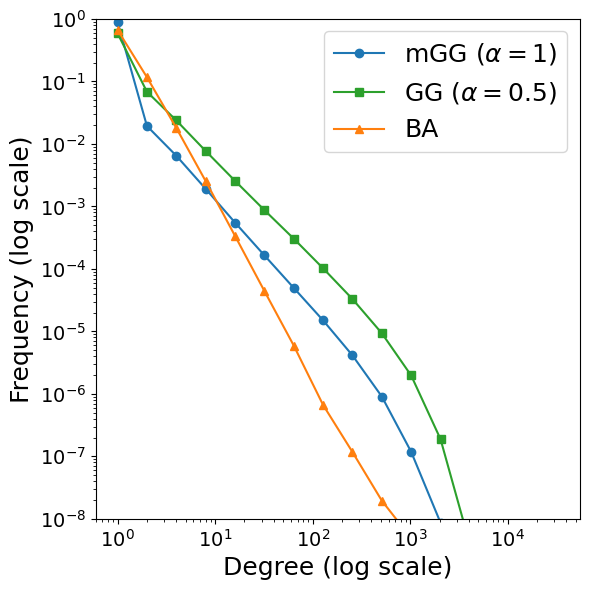

In [6]:
fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

# Plot mean values with different markers
ax.plot(centerbins, np.mean(quantile_freq_mGG, axis=0), marker='o', linestyle='-', color='tab:blue', label=r'mGG ($\alpha=1$)')
ax.plot(centerbins, np.mean(quantile_freq_GG, axis=0), marker='s', linestyle='-', color='tab:green', label=r'GG ($\alpha=0.5$)')
ax.plot(centerbins, np.mean(quantile_freq_ba, axis=0), marker='^', linestyle='-', color='tab:orange', label='BA')

# Log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Labels and limits
ax.set_ylim(10**(-8), 1)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Degree (log scale)', fontsize=18)
ax.set_ylabel('Frequency (log scale)', fontsize=18)

plt.tight_layout()
plt.legend(fontsize=18)
plt.show()



# Comparative number of nodes, number of edges an proportion of nodes of degree one

In [13]:
n_rep = 5  # Number of graph repetitions
nbstep = 10
bins=16

eta_min = 50
eta_max = 1000

# Generate logarithmically spaced indices
ETA = np.unique(np.round(np.logspace(np.log10(eta_min), np.log10(eta_max), nbstep)).astype(int))
print(ETA)

[  50   70   97  136  189  264  368  514  717 1000]


In [14]:
Tmax = 1
alpha = 1.0
tau = 0.0
beta_true = 1. 
c_true = 1.0


# H= uniforme on [0,Tmax]
N_weight = 10**6 # Number of weights

## CRM
NbNodes_mGG = np.zeros((n_rep, nbstep))
NbEdges_mGG = np.zeros((n_rep, nbstep))
FREQ_mGG = np.zeros((n_rep, nbstep))


for i in tqdm(range(n_rep)):
   for j in tqdm(range(nbstep)):
        w_CRM, missing_mass, S = mGG_size_biased_sampling(alpha, tau, beta_true, c_true, ETA[j], N_weight)
        G, wtrue, wtrue_rem, G_multi, ind_w = CRMtoGraph(w_CRM, missing_mass, store=True)
        K = G.shape[0]
        NbNodes_mGG[i,j] = G.shape[0]
        NbEdges_mGG[i,j] = G.nnz // 2
        centerbins, freq, deg = plot_degree(G, bins=bins, display=False)
        FREQ_mGG[i,j] = freq[0]
    
print(K)

100%|██████████| 5/5 [00:14<00:00,  2.84s/it]

139934


In [15]:
# Parameters
Tmax=1    # H= uniforme on [0,Tmax]
alpha=0.5
beta=1.
c=1.

N_weight = 10**6 # Number of weights


## CRM
NbNodes_GG = np.zeros((n_rep-1, nbstep))
NbEdges_GG = np.zeros((n_rep-1, nbstep))
FREQ_GG = np.zeros((n_rep-1, nbstep))


for i in tqdm(range(n_rep-1)):
     for j in tqdm(range(nbstep)):
        w_CRM, missing_mass = GG_size_biased_sampling(alpha, beta, ETA[j],1, N_weight)
        G, wtrue, wtrue_rem, G_multi, ind_w = CRMtoGraph(w_CRM, missing_mass, store=True)
        K = G.shape[0]
        NbNodes_GG[i,j] = G.shape[0]
        NbEdges_GG[i,j] = G.nnz // 2
        centerbins, freq, deg = plot_degree(G, bins=bins, display=False)
        FREQ_GG[i,j] = freq[0]
print(K)

100%|██████████| 4/4 [00:08<00:00,  2.01s/it]

88759


In [16]:
NbNodes_BA = np.zeros(nbstep)
NbEdges_BA = np.zeros(nbstep)
FREQ_BA = np.zeros(nbstep)

m = 1  # Number of edges per new node (adjustable)

for i in range(nbstep): 
    N= NbNodes_mGG[0,i]
    # Generate a Barabási–Albert graph
    G = nx.barabasi_albert_graph(N, m)
    NbNodes_BA[i] = G.number_of_nodes()
    NbEdges_BA[i] = G.number_of_edges()
    degree_one_nodes = sum(1 for _, d in G.degree() if d == 1)
    total_nodes = G.number_of_nodes()
    FREQ_BA[i]= degree_one_nodes / total_nodes if total_nodes > 0 else 0


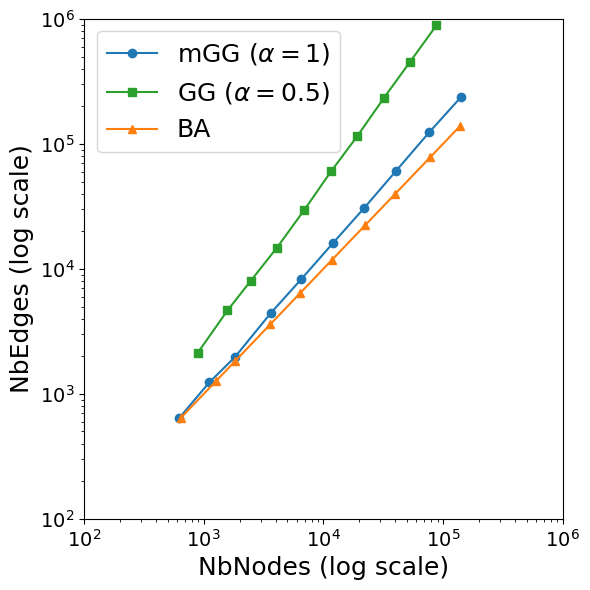

In [19]:
fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

# Compute means
mean_NbNodes_mGG = np.mean(NbNodes_mGG, axis=0)
mean_NbEdges_mGG = np.mean(NbEdges_mGG, axis=0)

mean_NbNodes_GG = np.mean(NbNodes_GG, axis=0)
mean_NbEdges_GG = np.mean(NbEdges_GG, axis=0)

mean_NbNodes_BA = np.mean(NbNodes_BA)
mean_NbNodes_BA = np.mean(NbEdges_BA)

# Plot mean points with different markers
plt.plot(mean_NbNodes_mGG, mean_NbEdges_mGG, marker='o', linestyle='-', color='tab:blue', label=r"mGG ($\alpha=1$)")
plt.plot(mean_NbNodes_GG, mean_NbEdges_GG, marker='s', linestyle='-', color='tab:green', label=r"GG ($\alpha=0.5)$")
plt.plot(NbNodes_BA, NbEdges_BA, marker='^', linestyle='-', color='tab:orange', label="BA")

# Log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Labels and limits
ax.set_xlabel('NbNodes (log scale)', fontsize=18)
ax.set_ylabel('NbEdges (log scale)', fontsize=18)
ax.set_xlim(100, 10**6)
ax.set_ylim(100, 10**6)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=18)
plt.show()


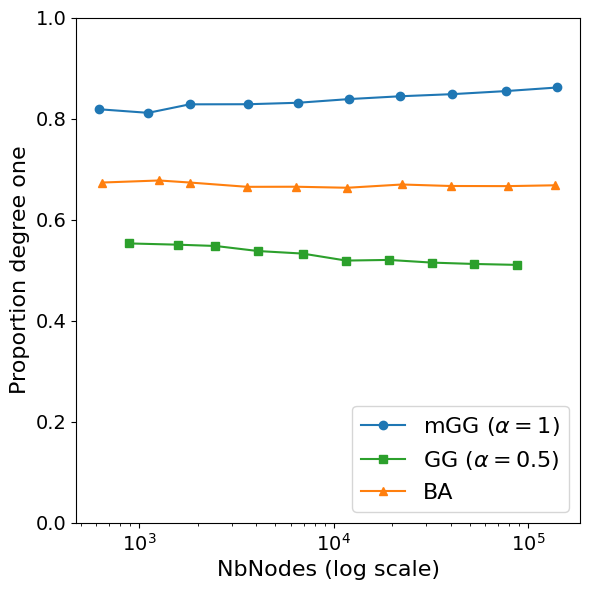

In [20]:
fig, ax = plt.subplots(dpi=100, figsize=(6, 6))

# Compute means
mean_NbNodes_mGG = np.mean(NbNodes_mGG, axis=0)
mean_FREQ_mGG = np.mean(FREQ_mGG, axis=0)

mean_NbNodes_GG = np.mean(NbNodes_GG, axis=0)
mean_FREQ_GG = np.mean(FREQ_GG, axis=0)

mean_NbNodes_BA = np.mean(NbNodes_BA)
mean_FREQ_BA = np.mean(FREQ_BA)

# Plot mean points with different markers
plt.plot(mean_NbNodes_mGG, mean_FREQ_mGG, marker='o', linestyle='-', color='tab:blue', label=r"mGG ($\alpha=1$)")
plt.plot(mean_NbNodes_GG, mean_FREQ_GG, marker='s', linestyle='-', color='tab:green', label=r"GG ($\alpha=0.5$)")
plt.plot(NbNodes_BA, FREQ_BA, marker='^', linestyle='-', color='tab:orange', label="BA")

# Log-log scale
ax.set_xscale('log')

# Labels and limits
ax.set_xlabel('NbNodes (log scale)', fontsize=16)
ax.set_ylabel('Proportion degree one', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.ylim(0, 1)
plt.tight_layout()
plt.legend(fontsize=16, loc='lower right')
plt.show()
